In [1]:
# pip install networkx
# pip install nbformat

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
from collections import Counter


In [3]:
df = pd.read_csv("dataset/updated_with_year.csv")

In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,20163,20164,20165,20166,20167,20168,20169,20170,20171,20172
srctype,b,p,j,j,j,j,j,b,p,j,...,j,j,j,j,j,j,j,j,j,j
eid,2-s2.0-85077976956,2-s2.0-85060936020,2-s2.0-85052201238,2-s2.0-85051498032,2-s2.0-85050678366,2-s2.0-85059846549,2-s2.0-85053455291,2-s2.0-85078621193,2-s2.0-85061529820,2-s2.0-85058878790,...,2-s2.0-85118303218,2-s2.0-85118233030,2-s2.0-85115381484,2-s2.0-85112113039,2-s2.0-85111945558,2-s2.0-85111408415,2-s2.0-85110903700,2-s2.0-85106740832,2-s2.0-85106046890,2-s2.0-85170238281
prism:coverDate,2018-12-31,2018-12-31,2018-12-31,2018-12-31,2018-12-31,2018-12-30,2018-12-30,2018-12-28,2018-12-27,2018-12-26,...,2023-01-01,2023-01-01,2023-01-01,2023-01-01,2023-01-01,2023-01-01,2023-01-01,2023-01-01,2023-01-01,2023-12-31
prism:aggregationType,Book,Conference Proceeding,Journal,Journal,Journal,Journal,Journal,Book,Conference Proceeding,Journal,...,Journal,Journal,Journal,Journal,Journal,Journal,Journal,Journal,Journal,Journal
prism:url,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...,https://api.elsevier.com/content/abstract/scop...
subtypeDescription,Book Chapter,Conference Paper,Article,Article,Article,Article,Article,Book Chapter,Conference Paper,Article,...,Article,Article,Article,Article,Article,Review,Article,Article,Article,Article
prism:isbn,"[{'$': '9783319984858'}, {'$': '9783319984841'}]",9784885523151,NaN,NaN,NaN,NaN,NaN,"[{'$': '9783319996844'}, {'$': '9783319996820'}]",9781538676783,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prism:publicationName,"Radiology in Global Health: Strategies, Implem...",Progress in Electromagnetics Research Symposium,Chemical Engineering Science,Applied Surface Science,Analytica Chimica Acta,Polish Journal of Management Studies,Gene,Essentials of Interventional Cancer Pain Manag...,Proceedings of the 5th Asian Conference on Def...,Langmuir,...,JDR Clinical and Translational Research,IEEE Transactions on Services Computing,Applied Economics Letters,International Journal of Construction Management,Catalysis Today,Critical Reviews in Analytical Chemistry,Compare,Journal of Applied Aquaculture,Journal of the Asia Pacific Economy,International Journal of Biological Macromolec...
source-id,21100942340,21000195302,16413,28983,23911,21100326278,15636,21100958129,21100898525,26987,...,21100869243,18300156728,18769,18800156713,16377,23973,12860,13512,22754,17544
citedby-count,1.0,1.0,21.0,37.0,68.0,15.0,13.0,0.0,24.0,3.0,...,0.0,4.0,1.0,5.0,3.0,11.0,5.0,6.0,3.0,0.0


In [5]:
import pandas as pd

# Load the uploaded CSV file to inspect its structure and contents
file_path = 'dataset/updated_with_year.csv'
data = pd.read_csv(file_path)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20173 entries, 0 to 20172
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   srctype                20173 non-null  object 
 1   eid                    20173 non-null  object 
 2   prism:coverDate        20173 non-null  object 
 3   prism:aggregationType  20173 non-null  object 
 4   prism:url              20173 non-null  object 
 5   subtypeDescription     20173 non-null  object 
 6   prism:isbn             1648 non-null   object 
 7   prism:publicationName  20173 non-null  object 
 8   source-id              20173 non-null  int64  
 9   citedby-count          20169 non-null  float64
 10  subtype                20173 non-null  object 
 11  prism:pageRange        12052 non-null  object 
 12  dc:title               20172 non-null  object 
 13  prism:endingPage       12052 non-null  object 
 14  openaccess             18509 non-null  float64
 15  op

In [6]:
def analyze_top_cited_journals(data, top_n=10):
    """
    Analyze and visualize the top-cited journals, handling long text labels.

    Parameters:
        data (DataFrame): The dataset containing journal and citation data.
        top_n (int): The number of top-cited journals to visualize.
    Returns:
        None: Displays a bar chart of top-cited journals.
    """
    # Identify top-cited journals
    top_cited = data.groupby('prism:publicationName')['citedby-count'].sum().sort_values(ascending=False).head(top_n)
    
    # Truncate or format long journal names

    top_cited.index = top_cited.index.map(str)
    top_cited.index = top_cited.index.map(lambda x: x[:20] + "..." if len(x) > 20 else x)
    print(top_cited.index)
    # Plot the top-cited journals
    fig = px.bar(
        top_cited,
        x=top_cited.index,
        y=top_cited.values,
        labels={'x': 'Journal Name', 'y': 'Total Citations'},
        title=f"Top {top_n} Journals by Total Citations",
        color=top_cited.index,
        color_discrete_sequence=['skyblue']
    )
    fig.update_layout(
        xaxis_title="Journal Name",
        yaxis_title="Total Citations",
        xaxis_tickangle=-45,
        xaxis=dict(tickmode='array', tickvals=top_cited.index),
    )
    fig.show()

def analyze_open_access_trends(data):
    """
    Analyze and visualize the open-access trends.

    Parameters:
        data (DataFrame): The dataset containing open-access flag data.

    Returns:
        None: Displays a pie chart of open-access vs closed access trends.
    """ 
    # Analyze open-access trends
    open_access_trends = data['openaccessFlag'].value_counts()

    # Plot open-access trends
    fig = px.pie(
        names=open_access_trends.index,
        values=open_access_trends.values,
        title="Open Access vs Closed Access",
        color=open_access_trends.index,
        color_discrete_sequence=['lightgreen', 'lightcoral'],
        hole=0.3
    )
    fig.update_traces(textinfo='percent+label', pull=[0, 0.1])
    fig.show()


def analyze_funding_agency_counts(data, top_n=10):
    """
    Display the top funding agencies by count.

    Parameters:
        data (DataFrame): The dataset containing funding agency data.
        top_n (int): The number of top funding agencies to display.

    Returns:
        None: Prints the top funding agencies by count.
    """
    # Explore funding patterns
    funding_counts = data['Funding Agencies'].value_counts().head(top_n)

    print(f"Top {top_n} Funding Agencies by Count:")
    print(funding_counts)


# Usage example
# Call each function with the dataset
analyze_top_cited_journals(data, top_n=10)
analyze_open_access_trends(data)
analyze_funding_agency_counts(data, top_n=10)


Index(['Journal of High Ener...', 'Scientific Reports',
       'Physics Letters, Sec...', 'European Physical Jo...',
       'Physical Review Lett...', 'Physical Review D',
       'Asian Pacific Journa...', 'PLoS ONE', 'International Journa...',
       'Molecular Neurobiolo...'],
      dtype='object', name='prism:publicationName')


Top 10 Funding Agencies by Count:
Funding Agencies
Chulalongkorn University                                                    1321
Thailand Research Fund                                                       209
Chulalongkorn University,Thailand Research Fund                              157
Second Century Fund,Chulalongkorn University                                 128
Ratchadaphiseksomphot Endowment Fund,Chulalongkorn University                115
National Research Council of Thailand                                        102
Chulalongkorn University,National Research Council of Thailand                83
Ratchadapisek Sompoch Endowment Fund,Chulalongkorn University                 66
Mahidol University                                                            52
Ratchadapiseksompotch Fund,Faculty of Medicine, Chulalongkorn University      43
Name: count, dtype: int64


In [7]:
# Function to clean and preprocess funding agency data
def preprocess_funding_agencies(data, column_name='Funding Agencies'):
    data[column_name] = data[column_name].fillna('')
    funding_agencies = data[column_name].str.split(',').explode().str.strip().dropna()
    return funding_agencies

# Function to count and filter the top N funding agencies
def get_top_agencies(funding_agencies, top_n=10):
    agency_count = funding_agencies.value_counts()
    top_agencies = agency_count.head(top_n).index
    return top_agencies

# Function to create edges for the network graph
def create_edges(data, column_name, top_agencies=None):
    edges = set()  # Using a set to avoid duplicate pairs
    # Ensure top_agencies is a list
    if top_agencies is not None and isinstance(top_agencies, pd.Index):
        top_agencies = top_agencies.tolist()
        
    for _, row in data.iterrows():
        agencies = row[column_name]
        if pd.notna(agencies) and agencies != '':
            agencies_list = [agency.strip() for agency in agencies.split(',')]
            # Filter to only include top agencies if provided
            if top_agencies:
                agencies_list = [agency for agency in agencies_list if agency in top_agencies]
            # Create pairs only from filtered agencies
            if len(agencies_list) > 1:
                for i in range(len(agencies_list)):
                    for j in range(i + 1, len(agencies_list)):
                        edge = tuple(sorted([agencies_list[i], agencies_list[j]]))
                        edges.add(edge)
    return list(edges)

# Function to create a network graph and calculate node positions
def build_graph(edges):
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G, k=0.15, iterations=20)
    return G, pos

# Function to prepare Plotly traces for visualization
def prepare_traces(G, pos):
    # Prepare edges
    edge_x, edge_y = [], []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_y.append(y0)
        edge_y.append(y1)
    
    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='gray'),
        hoverinfo='none',
        mode='lines'
    )
    
    # Prepare nodes
    node_x, node_y = [], []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
    
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        hoverinfo='text',
        textposition='bottom center',
        marker=dict(
            showscale=True,
            colorscale='YlGnBu',
            size=[G.degree(node) * 2 for node in G.nodes()],
            colorbar=dict(
                thickness=100,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            )
        )
    )
    # Add node labels to hoverinfo
    node_text = [f"{node} ({G.degree(node)} connections)" for node in G.nodes()]
    node_trace.marker.color = [G.degree(node) for node in G.nodes()]
    node_trace.text = node_text
    
    return edge_trace, node_trace

# Function to create and display/save the graph
def visualize_network(edge_trace, node_trace, output_file="funding_agencies_network_with_labels.html"):
    fig = go.Figure(
        data=[edge_trace, node_trace],
        layout=go.Layout(
            title='Simplified Funding Agencies Collaboration Network',
            titlefont_size=16,
            showlegend=False,
            hovermode='closest',
            xaxis=dict(showgrid=False, zeroline=False),
            yaxis=dict(showgrid=False, zeroline=False)
        )
    )
    # fig.write_html(output_file)
    fig.show()
    print(f"Graph saved as {output_file}")

# Main function to execute the workflow
def main(data, column_name='Funding Agencies', top_n=10, output_file="funding_agencies_network_with_labels.html"):
    # Step 1: Preprocess data
    funding_agencies = preprocess_funding_agencies(data, column_name)
    
    # Step 2: Get top N agencies
    top_agencies = get_top_agencies(funding_agencies, top_n)
    
    # Step 3: Create edges
    edges = create_edges(data, column_name, top_agencies)
    
    # Step 4: Build graph
    G, pos = build_graph(edges)
    
    # Step 5: Prepare Plotly traces
    edge_trace, node_trace = prepare_traces(G, pos)
    
    # Step 6: Visualize network
    visualize_network(edge_trace, node_trace, output_file)
    
    # Optional: Print summary stats
    print(f"Number of nodes (funding agencies): {len(G.nodes())}")
    print(f"Number of edges (collaborations): {len(G.edges())}")

# Example usage (assuming `data` is your DataFrame)
main(data, column_name='Funding Agencies', top_n=20)


Graph saved as funding_agencies_network_with_labels.html
Number of nodes (funding agencies): 19
Number of edges (collaborations): 135


In [8]:
# Function to filter rows containing a specific keyword in the Funding Agencies column
def filter_by_funding_agency(data, keyword, column_name='Funding Agencies'):
    return data[data[column_name].str.contains(keyword, case=False, na=False)]

# Function to extract co-occurring funding agencies (excluding a specific keyword)
def extract_co_occurring_agencies(filtered_data, keyword, column_name='Funding Agencies'):
    co_occurring_agencies = []
    for _, row in filtered_data.iterrows():
        agencies = row[column_name].split(',')
        # Exclude the keyword from the agency list
        agencies = [agency.strip() for agency in agencies if keyword.lower() not in agency.lower()]
        co_occurring_agencies.extend(agencies)
    return co_occurring_agencies

# Function to count the frequency of co-occurring agencies
def count_co_occurrences(co_occurring_agencies):
    return Counter(co_occurring_agencies)

# Function to prepare a DataFrame for visualization
def prepare_top_agencies_df(co_occurrence_count, top_n):
    top_co_occurring_agencies = co_occurrence_count.most_common(top_n)
    return pd.DataFrame(top_co_occurring_agencies, columns=['Agency', 'Count'])

# Function to create a bar plot using Plotly
def plot_top_agencies(top_agencies_df, top_n, keyword):
    fig = px.bar(
        top_agencies_df, 
        x='Agency', 
        y='Count',
        title=f"Top {top_n} Funding Agencies Most Related to {keyword}",
        labels={'Agency': 'Funding Agency', 'Count': 'Co-occurrence Count'},
        color='Count', 
        color_continuous_scale='Viridis'
    )
    fig.show()

# Renamed main function for workflow execution
def analyze_funding_agencies(data, keyword='Chulalongkorn', column_name='Funding Agencies', top_n=10):
    # Step 1: Filter data by keyword
    filtered_data = filter_by_funding_agency(data, keyword, column_name)
    
    # Step 2: Extract co-occurring agencies
    co_occurring_agencies = extract_co_occurring_agencies(filtered_data, keyword, column_name)
    
    # Step 3: Count co-occurrence frequencies
    co_occurrence_count = count_co_occurrences(co_occurring_agencies)
    
    # Step 4: Prepare a DataFrame for the top N agencies
    top_agencies_df = prepare_top_agencies_df(co_occurrence_count, top_n)
    
    # Step 5: Plot the results
    plot_top_agencies(top_agencies_df, top_n, keyword)

# Example usage (assuming `data` is your DataFrame)
analyze_funding_agencies(data, keyword='Chulalongkorn', column_name='Funding Agencies', top_n=10)
data['Funding Agencies'].value_counts().head(10)


Funding Agencies
                                                                  6271
Chulalongkorn University                                          1321
Thailand Research Fund                                             209
Chulalongkorn University,Thailand Research Fund                    157
Second Century Fund,Chulalongkorn University                       128
Ratchadaphiseksomphot Endowment Fund,Chulalongkorn University      115
National Research Council of Thailand                              102
Chulalongkorn University,National Research Council of Thailand      83
Ratchadapisek Sompoch Endowment Fund,Chulalongkorn University       66
Mahidol University                                                  52
Name: count, dtype: int64

In [9]:
funding_counts = data['Funding Agencies'].value_counts().head(10)

In [10]:
funding_counts

Funding Agencies
                                                                  6271
Chulalongkorn University                                          1321
Thailand Research Fund                                             209
Chulalongkorn University,Thailand Research Fund                    157
Second Century Fund,Chulalongkorn University                       128
Ratchadaphiseksomphot Endowment Fund,Chulalongkorn University      115
National Research Council of Thailand                              102
Chulalongkorn University,National Research Council of Thailand      83
Ratchadapisek Sompoch Endowment Fund,Chulalongkorn University       66
Mahidol University                                                  52
Name: count, dtype: int64

In [11]:
data['Organizations']

0        Department of Preventive and Social Medicine,F...
1        Department of Electrical Engineering,Wireless ...
2        Center of Excellence in Catalysis and Catalyti...
3        Department of Chemistry,Faculty of Science and...
4        Program in Petrochemistry,Faculty of Science,C...
                               ...                        
20168    Department of Chemistry,Faculty of Science,Chu...
20169    Centre for Education and International Develop...
20170    Program of Fisheries Science,Faculty of Interd...
20171    Faculty of Applied Science and Center for Prof...
20172    Metallurgy and Materials Science Research Inst...
Name: Organizations, Length: 20173, dtype: object

## Article per year

In [12]:

def article_per_year(data):
    articles_per_year = data.groupby('year').size()

    # Create the line plot
    fig = px.line(articles_per_year, title='Number of Articles Published per Year', labels={'year': 'Year', '0': 'Number of Articles'})
    return fig 

fig1 = article_per_year(data)
# Add annotations or vertical lines (optional)
fig1.add_vline(x=2020, line=dict(color='purple', width=2, dash='dash'), annotation_text="Pandemic Year", annotation_position="top right")

# Show the plot
fig1.show()


## Model 

In [20]:
def preprocess_keywords(data, column_name='auth-keywords'):
    data = data[data[column_name] != '']  # Drop rows where the value is an empty string
    return data

# Function to get the top N most frequent keywords
def get_top_keywords(data, column_name='auth-keywords', top_n=10):
    # Split keywords by commas, explode them into individual keywords, and clean up spaces
    keywords = data[column_name].str.split(',').explode().str.strip().dropna()
    
    # Count the frequency of each keyword
    keyword_counts = keywords.value_counts().head(top_n)
    keyword_counts_df = pd.DataFrame({'Keyword': keyword_counts.index, 'Count': keyword_counts.values})
    # Convert the result into a DataFrame for Plotly
    return keyword_counts_df

# Function to create a pie chart using Plotly
def create_keyword_pie_chart(keyword_counts_df, title="Top Keywords in 'auth-keywords'"):
    fig = px.pie(
        keyword_counts_df, 
        names='Keyword', 
        values='Count', 
        title=title
    )
    fig.show()

# Main function to execute the workflow
def analyze_top_keywords(data, column_name='auth-keywords', top_n=10):
    # Step 1: Preprocess the data
    data = preprocess_keywords(data, column_name)
    
    # Step 2: Get the top N keywords
    top_keywords = get_top_keywords(data, column_name, top_n)
    
    # Step 3: Create and display the pie chart
    create_keyword_pie_chart(
        top_keywords, 
        title=f"Top {top_n} Keywords in '{column_name}'"
    )

# Example usage (assuming `data` is your DataFrame):
analyze_top_keywords(data, column_name='auth-keywords', top_n=10)
analyze_top_keywords(data, column_name='Funding Agencies', top_n=10)
analyze_top_keywords(data, column_name='Organizations',top_n=10)


In [19]:
get_top_keywords(df)

,Count,count
0,Thailand,747
1,COVID-19,282
2,Hadron-Hadron scattering (experiments),152
3,Inflammation,130
4,SARS-CoV-2,115
5,HIV,114
6,CMS,98
7,Oxidative stress,83
8,Asia,81
9,Machine learning,78


In [15]:
df['auth-keywords']

0                                                      NaN
1                                                      NaN
2        Circulating fluidized bed,Computational fluid ...
3        Encapsulation,Fluoroalkylsilane,Natural rubber...
4        acpcPNA,Electrochemical impedance spectroscopy...
                               ...                        
20168    Biological hazards,chemical hazards,food conta...
20169    conflict,Education,peacebuilding,social justic...
20170    Anabas testudineus,Black soldier fly,fish meal...
20171    Cambodia,consumption,expenditure,Impact,inequa...
20172    Alzheimer's disease,Hydrogel colorimetric sens...
Name: auth-keywords, Length: 20173, dtype: object

In [ ]:
data.columns

Index(['srctype', 'eid', 'prism:coverDate', 'prism:aggregationType',
       'prism:url', 'subtypeDescription', 'prism:isbn',
       'prism:publicationName', 'source-id', 'citedby-count', 'subtype',
       'prism:pageRange', 'dc:title', 'prism:endingPage', 'openaccess',
       'openaccessFlag', 'prism:doi', 'prism:startingPage', 'dc:identifier',
       'dc:publisher', 'creator_given_name', 'creator_surname', 'creator_auid',
       'link_self', 'link_scopus', 'Countries', 'Organizations',
       'Funding Agencies', 'auth-keywords', 'dc:description', 'prism:volume',
       'prism:issn', 'publishercopyright', 'article-number', 'pii',
       'pubmed-id', 'prism:issueIdentifier', 'year'],
      dtype='object')

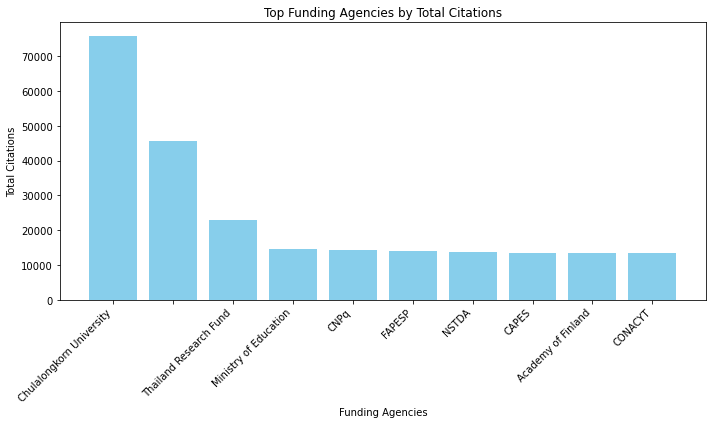

               Funding Agency  Total Citations
2    Chulalongkorn University          75953.0
0                                      45659.0
5      Thailand Research Fund          22889.0
191     Ministry of Education          14641.0
25                       CNPq          14330.0
88                     FAPESP          14065.0
107                     NSTDA          13843.0
92                      CAPES          13598.0
93         Academy of Finland          13408.0
98                    CONACYT          13367.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Fill missing values in the 'Funding Agencies' and 'citedby-count' columns
data['Funding Agencies'] = data['Funding Agencies'].fillna('')
data['citedby-count'] = data['citedby-count'].fillna(0)

# 1. Clean and split the 'Funding Agencies' column to handle multiple agencies per project
data['Funding Agencies'] = data['Funding Agencies'].str.split(',')

# 2. Create a list of all funding agencies and their citation counts
funding_agency_citations = {}

for index, row in data.iterrows():
    citations = row['citedby-count']
    agencies = row['Funding Agencies']
    
    for agency in agencies:
        agency = agency.strip()  # Remove extra spaces
        if agency in funding_agency_citations:
            funding_agency_citations[agency] += citations  # Add citations to existing agency
        else:
            funding_agency_citations[agency] = citations  # Initialize with citation count

# 3. Convert the dictionary to a DataFrame for easy handling
funding_df = pd.DataFrame(funding_agency_citations.items(), columns=['Funding Agency', 'Total Citations'])

# 4. Sort the data by the number of citations (descending)
funding_df = funding_df.sort_values(by='Total Citations', ascending=False)

# 5. Display the top funding agencies
top_funding_agencies = funding_df.head(10)

# 6. Plot the top funding agencies with citations
plt.figure(figsize=(10, 6))
plt.bar(top_funding_agencies['Funding Agency'], top_funding_agencies['Total Citations'], color='skyblue')
plt.xlabel('Funding Agencies')
plt.ylabel('Total Citations')
plt.title('Top Funding Agencies by Total Citations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Optionally, display the data for the top agencies
print(top_funding_agencies)



In [16]:
from geopy.geocoders import Nominatim
import pycountry

def get_coordinates(country):
    try:
        country_obj = pycountry.countries.get(name=country)
        geolocator = Nominatim(user_agent="my-application")
        location = geolocator.geocode(country_obj.name)
        return location.latitude, location.longitude
    except AttributeError:
        return None, None

ModuleNotFoundError: No module named 'geopy'

In [ ]:
from geopy.geocoders import Nominatim

# Update the user_agent to a custom value
geolocator = Nominatim(user_agent="my_custom_user_agent")
country_record = pd.read_csv('./dataset/country-coord.csv')

def get_coordinates2(country):
    try:
        # Ensure `country_record` is a valid DataFrame
        if 'Country' not in country_record.columns or \
           'latitude' not in country_record.columns or \
           'longitude' not in country_record.columns:
            raise ValueError("country_record must contain 'Country', 'latitude', and 'longitude' columns")
        
        # Filter for the specified country
        result = country_record[country_record['Country'] == country][['latitude', 'longitude']]
        
        # Check if the country exists in the DataFrame
        if result.empty:
            raise ValueError(f"Country '{country}' not found in country_record")
        
        # If there are multiple records, take the first one (or handle accordingly)
        if len(result) > 1:
            print(f"Warning: Multiple records found for '{country}', returning the first match")
        
        # Return the first record as a tuple
        return result.iloc[0].latitude, result.iloc[0].longitude
    
    except ValueError as e:
        # Handle missing or invalid cases
        print(f"Error: {e}")
        return None, None
    except Exception as e:
        # Catch any other unexpected errors
        print(f"Unexpected error: {e}")
        return None, None


print(type(get_coordinates('United States')[0]))
df.head()
# df[['latitude', 'longitude']] = df['country'].apply(get_coordinates).apply(pd.Series)

<class 'float'>


,srctype,eid,prism:coverDate,prism:aggregationType,prism:url,subtypeDescription,prism:isbn,prism:publicationName,source-id,citedby-count,...,auth-keywords,dc:description,prism:volume,prism:issn,publishercopyright,article-number,pii,pubmed-id,prism:issueIdentifier,year
0,b,2-s2.0-85077976956,2018-12-31,Book,https://api.elsevier.com/content/abstract/scop...,Book Chapter,"[{'$': '9783319984858'}, {'$': '9783319984841'}]","Radiology in Global Health: Strategies, Implem...",21100942340,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
1,p,2-s2.0-85060936020,2018-12-31,Conference Proceeding,https://api.elsevier.com/content/abstract/scop...,Conference Paper,9784885523151,Progress in Electromagnetics Research Symposium,21000195302,1.0,...,NaN,This paper presents the development of a flexi...,2018-August,19317360 15599450,"© 2018 The Institute of Electronics, Informati...",8597669,NaN,NaN,NaN,2018
2,j,2-s2.0-85052201238,2018-12-31,Journal,https://api.elsevier.com/content/abstract/scop...,Article,NaN,Chemical Engineering Science,16413,21.0,...,"Circulating fluidized bed,Computational fluid ...",Computational fluid dynamics was applied for s...,192,00092509,© 2018 Elsevier Ltd,NaN,S0009250918306183,NaN,NaN,2018
3,j,2-s2.0-85051498032,2018-12-31,Journal,https://api.elsevier.com/content/abstract/scop...,Article,NaN,Applied Surface Science,28983,37.0,...,"Encapsulation,Fluoroalkylsilane,Natural rubber...",A superhydrophobic/superoleophilic mesh was su...,462,01694332,© 2018 Elsevier B.V.,NaN,S0169433218321792,NaN,NaN,2018
4,j,2-s2.0-85050678366,2018-12-31,Journal,https://api.elsevier.com/content/abstract/scop...,Article,NaN,Analytica Chimica Acta,23911,68.0,...,"acpcPNA,Electrochemical impedance spectroscopy...",A label-free electrochemical DNA sensor based ...,1044,18734324 00032670,© 2018 Elsevier B.V.,NaN,S0003267018309097,30442390.0,NaN,2018


In [ ]:
data['Countries'].head()

0    Thailand,United States,Thailand,United States,...
1                                             Thailand
2         Thailand,Thailand,Thailand,Thailand,Thailand
3      Thailand,Japan,Japan,Thailand,Thailand,Thailand
4    Thailand,Thailand,Thailand,Thailand,Thailand,U...
Name: Countries, dtype: object

In [ ]:
expanded_data = []
num = 0


for index, row in data.iterrows():
    countries = row['Countries'].split(',')
    
    coords = [get_coordinates2(country) for country in countries]
    print(coords[0])
    for coord in coords:
        expanded_data.append({
            'Country': countries[coords.index(coord)],  # Country name
            'latitude': coord[0],
            'longitude': coord[1]
        })
    num += 1
    if num == 100:
        break
expanded_df = pd.DataFrame(expanded_data)
expanded_data

# Save DataFrame to CSV
expanded_df.to_csv('countries.csv', index=False)

(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(38.0, -97.0)
(15.0, 100.0)
(15.0, 100.0)
(35.0, 105.0)
(15.0, 100.0)
(15.0, 100.0)
(38.0, -97.0)
(15.0, 100.0)
(15.0, 100.0)
(54.0, -2.0)
(35.0, 105.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(40.0, 45.0)
(15.0, 100.0)
(15.0, 100.0)
(40.0, 45.0)
(35.0, 105.0)
(38.0, -97.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)
(15.0, 100.0)


In [ ]:
import pydeck as pdk
import streamlit as st

# Initialize a PyDeck layer to hold the lines
line_data = []
num = 0

# Loop through rows to link countries in the same row
for index, row in data.iterrows():
    countries = row['Countries'].split(',')
    
    # Get coordinates for each country in the row
    coords = [get_coordinates2(country) for country in countries]
    print(coords)
    
    # Link countries in the same row (draw lines between consecutive countries)
    for i in range(len(coords) - 1):
        line_data.append({
            'start_lat': coords[i][0],
            'start_lon': coords[i][1],
            'end_lat': coords[i + 1][0],
            'end_lon': coords[i + 1][1]
        })
    num += 1
    print(num)
    if num == 100:
        break
print(type(line_data))
df_list = pd.DataFrame(line_data)

# Save DataFrame to CSV
df_list.to_csv('line_data_list.csv', index=False)



[(15.0, 100.0), (38.0, -97.0), (15.0, 100.0), (38.0, -97.0), (38.0, -97.0), (38.0, -97.0)]
1
[(15.0, 100.0)]
2
[(15.0, 100.0), (15.0, 100.0), (15.0, 100.0), (15.0, 100.0), (15.0, 100.0)]
3
[(15.0, 100.0), (36.0, 138.0), (36.0, 138.0), (15.0, 100.0), (15.0, 100.0), (15.0, 100.0)]
4
[(15.0, 100.0), (15.0, 100.0), (15.0, 100.0), (15.0, 100.0), (15.0, 100.0), (38.0, -97.0)]
5
[(15.0, 100.0)]
6
[(15.0, 100.0), (15.0, 100.0), (15.0, 100.0)]
7
[(38.0, -97.0), (38.0, -97.0), (15.0, 100.0)]
8
[(15.0, 100.0), (15.0, 100.0)]
9
[(15.0, 100.0), (15.0, 100.0)]
10
[(35.0, 105.0), (15.0, 100.0), (35.0, 105.0)]
11
[(15.0, 100.0)]
12
[(15.0, 100.0), (15.0, 100.0)]
13
[(38.0, -97.0), (38.0, -97.0), (36.0, 138.0), (15.0, 100.0), (54.0, -2.0), (38.0, -97.0), (38.0, -97.0), (38.0, -97.0), (38.0, -97.0), (38.0, -97.0), (38.0, -97.0), (38.0, -97.0), (24.0, 54.0), (38.0, -97.0), (38.0, -97.0), (60.0, 100.0), (54.0, -2.0), (54.0, -2.0), (35.0, 105.0), (-10.0, -55.0), (-10.0, -55.0)]
14
[(15.0, 100.0), (15.0, 10

In [ ]:
country_record = pd.read_csv('./dataset/country-coord.csv')
country_record.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,latitude,longitude
0,Albania,AL,ALB,8,41.0000,20.0
1,Algeria,DZ,DZA,12,28.0000,3.0
2,American Samoa,AS,ASM,16,-14.3333,-170.0
3,Andorra,AD,AND,20,42.5000,1.6
4,Angola,AO,AGO,24,-12.5000,18.5
